# 先行研究モデル

## 必要なモジュールのインポート

In [1]:
%load_ext tensorboard
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import TensorBoard

## データセットの用意

In [2]:
train_path = "./datasets/train/*"
test_path = "./datasets/test/*"
val_path = "./datasets/val/*"

In [3]:
train_lists = glob.glob(train_path)
test_lists = glob.glob(test_path)
val_lists = glob.glob(val_path)

### trainのデータセット

In [16]:
train_utter_user = []
train_utter = []
train_utter_label = []

In [17]:
train_dataset = []
for train_paths in train_lists:
    f = open(train_paths, "r", encoding='utf-8')
    t_list = []
    for row in f:
        t_list.append(row.strip())
    train_dataset.append(t_list)
    f.close()

In [18]:
for data in train_dataset:
    d_utter = []
    d_user = []
    d_label = []
    for da in data:
        for i, d in enumerate(da.split("|")):
            if i == 0:
                d_user.append(d)
            elif i == 1:
                d_utter.append(d)
            else:
                d = tag_set(d)
                d_label.append(d)
  
    train_utter_user.append(d_user)
    train_utter_label.append(d_label)
    train_utter.append(d_utter)
            
print("finish")

finish


In [7]:
n_trains = 0
for n in train_utter:
    for j in n:
        n_trains += 1
print(n_trains)

146144


### testのデータセット

In [19]:
test_utter_user = []
test_utter = []
test_utter_label = []

In [20]:
test_dataset = []
for test_paths in test_lists:
    f = open(test_paths, "r", encoding='utf-8')
    t_list = []
    for row in f:
        t_list.append(row.strip())
    test_dataset.append(t_list)
    f.close()

In [21]:
for data in test_dataset:
    d_utter = []
    d_user = []
    d_label = []
    for da in data:
        for i, d in enumerate(da.split("|")):
            if i == 0:
                d_user.append(d)
            elif i == 1:
                d_utter.append(d)
            else:
                d = tag_set(d)
                d_label.append(d)
  
    test_utter_user.append(d_user)
    test_utter_label.append(d_label)
    test_utter.append(d_utter)
            
print("finish")

finish


In [22]:
n_tests = 0
for n in test_utter:
    for j in n:
        n_tests += 1
print(n_tests)

35109


### valのデータセット

In [23]:
val_utter_user = []
val_utter = []
val_utter_label = []

In [24]:
val_dataset = []
for val_paths in val_lists:
    f = open(val_paths, "r", encoding='utf-8')
    t_list = []
    for row in f:
        t_list.append(row.strip())
    val_dataset.append(t_list)
    f.close()

In [25]:
for data in val_dataset:
    d_utter = []
    d_user = []
    d_label = []
    for da in data:
        for i, d in enumerate(da.split("|")):
            if i == 0:
                d_user.append(d)
            elif i == 1:
                d_utter.append(d)
            else:
                d = tag_set(d)
                d_label.append(d)
  
    val_utter_user.append(d_user)
    val_utter_label.append(d_label)
    val_utter.append(d_utter)
            
print("finish")

finish


In [26]:
n_vals = 0
for n in val_utter:
    for j in n:
        n_vals += 1
print(n_vals)

18487


### タグセット削減

In [15]:
def tag_set(tag):

    if tag == "sd" or tag =="sv":
        return "Statement"

    elif tag == "%" or tag == "t1" or tag == "t3":
        return "Uninterpretable"

    elif tag == "b" or tag == "br" or tag == "b^m" or tag == "^2" or tag == "bf" or tag == "bd" or tag == "ba" or tag == "bk":
        return "Understanding"

    elif tag == "aa" or tag == "aap_am" or tag == "ar" or tag == "^h" or tag == "ny" or tag == "nn" or tag == "na" or tag == "ng" or tag == "no" or tag == "arp_nd":
        return "Agreement"

    elif tag == "ad":
        return "Directive"

    elif tag == "fp" or tag == "fc":
        return "Greeting"

    elif tag == "qy" or tag == "qw" or tag == "qrr" or tag == "qy^d" or tag == "qw^d" or tag == "^g" or tag == "bh" or tag == "qh" or tag == "qo":
        return "Question"

    elif tag == "fa" or tag == "ft":
        return "Apology"

    else:
        return "Other"

### 発話処理

In [27]:
## ボキャブラリーリスト
vocabulary_set = set()
## トークナイザー
# tokenizer = tfds.deprecated.text.Tokenizer()
tokenizer = tfds.features.text.Tokenizer()
max_len = 0

# full_utter = [train_utter, test_utter, val_utter]

## 分かち書き
full_utter = [train_utter, test_utter, val_utter]
for utter in full_utter:
    for u in utter:
        for idx, text in enumerate(u):
            some_tokens = tokenizer.tokenize(text)
            vocabulary_set.update(some_tokens)
            if len(some_tokens) > max_len:
                max_len = len(some_tokens)

# encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)
## ボキャブラリーリスト作成
vocab_size = len(vocabulary_set)

In [28]:
# ID化
train = []
for i, dialogue in enumerate(train_utter):
  datasets = []
  for text in dialogue:
    some_ids = encoder.encode(text)
    datasets.append(np.pad(some_ids, [0, max_len - len(some_ids)], 'constant'))
  train.append(datasets)

In [29]:
# ID化
test = []
for i, dialogue in enumerate(test_utter):
  datasets = []
  for text in dialogue:
    some_ids = encoder.encode(text)
    datasets.append(np.pad(some_ids, [0, max_len - len(some_ids)], 'constant'))
  test.append(datasets)

In [30]:
# ID化
val = []
for i, dialogue in enumerate(val_utter):
  datasets = []
  for text in dialogue:
    some_ids = encoder.encode(text)
    datasets.append(np.pad(some_ids, [0, max_len - len(some_ids)], 'constant'))
  val.append(datasets)

### ラベル処理

In [32]:
act_tag_list = ["Statement", "Uninterpretable", "Understanding", "Agreement", "Directive", "Greeting", "Question", "Apology", "Other"]

In [33]:
labels={}
for i,v in enumerate(act_tag_list):
    labels[v] = i

label_e = np.eye(len(act_tag_list), k=1, dtype=np.int32)

label = {}
for i,v in enumerate(act_tag_list):
    label[v] = label_e[i]

In [34]:
# ID化
train_label = []
for i, act_lists in enumerate(train_utter_label):
  datasets = []
  for act in act_lists:
    datasets.append(label[act])
  train_label.append(datasets)

In [35]:
# ID化
test_label = []
for i, act_lists in enumerate(test_utter_label):
  datasets = []
  for act in act_lists:
    datasets.append(label[act])
  test_label.append(datasets)

In [36]:
# ID化
val_label = []
for i, act_lists in enumerate(val_utter_label):
  datasets = []
  for act in act_lists:
    datasets.append(label[act])
  val_label.append(datasets)

In [37]:
true_label = {}
for l, v in label.items():
    true_label[np.argmax(v)] = l

### ユーザ処理

In [38]:
u = ["A","B"]
e = np.eye(len(u), k=1, dtype=np.int32)
users_lists={}
for i,v in enumerate(u):
    users_lists[v] = e[i]

In [39]:
# ID化
train_user = []
for i, user_lists in enumerate(train_utter_user):
  datasets = []
  for user in user_lists:
    datasets.append(users_lists[user])
  train_user.append(datasets)

In [40]:
# ID化
test_user = []
for i, user_lists in enumerate(test_utter_user):
  datasets = []
  for user in user_lists:
    datasets.append(users_lists[user])
  test_user.append(datasets)

In [41]:
# ID化
val_user = []
for i, user_lists in enumerate(val_utter_user):
  datasets = []
  for user in user_lists:
    datasets.append(users_lists[user])
  val_user.append(datasets)

## データセットのTensorflow化

In [42]:
# 訓練対話データセット
train_dialogue_user = []
train_dialogue_utters = []
train_dialogue_act = []

# テスト対話データセット
test_dialogue_user = []
test_dialogue_utters = []
test_dialogue_act = []

# 検証対話データセット
val_dialogue_user = []
val_dialogue_utters = []
val_dialogue_act = []

In [43]:
## 対話数
dialog_size=5

### 対話の訓練データ

In [44]:
## 訓練対話データ生成
for idx, utteraces in enumerate(train):
  
  for i in range(0, len(utteraces)-dialog_size):

    train_dialogue_utters.append([utteraces[x] for x in range(i, i+dialog_size)])
    train_dialogue_act.append([train_label[idx][x] for x in range(i, i+dialog_size)])
    train_dialogue_user.append([train_user[idx][x] for x in range(i, i+dialog_size)])

In [45]:
train_dialogues = tf.data.Dataset.from_tensor_slices((train_dialogue_user, train_dialogue_utters, train_dialogue_act))

### 対話のテストデータ

In [46]:
## テスト対話データ生成
for idx, utteraces in enumerate(test):

  for i in range(0, len(utteraces)-dialog_size):
      
    test_dialogue_utters.append([utteraces[x] for x in range(i, i+dialog_size)])
    test_dialogue_act.append([test_label[idx][x] for x in range(i, i+dialog_size)])
    test_dialogue_user.append([test_user[idx][x] for x in range(i, i+dialog_size)])

In [47]:
test_dialogues = tf.data.Dataset.from_tensor_slices((test_dialogue_user, test_dialogue_utters, test_dialogue_act))

### 対話の検証データ

In [48]:
## 訓練対話データ生成
for idx, utteraces in enumerate(val):
  
  for i in range(0, len(utteraces)-dialog_size):
    
    val_dialogue_utters.append([utteraces[x] for x in range(i, i+dialog_size)])
    val_dialogue_act.append([val_label[idx][x] for x in range(i, i+dialog_size)])
    val_dialogue_user.append([val_user[idx][x] for x in range(i, i+dialog_size)])

In [49]:
val_dialogues = tf.data.Dataset.from_tensor_slices((val_dialogue_user, val_dialogue_utters, val_dialogue_act))

### パディングサイズ

In [50]:
batch_size=64

In [52]:
utter_train_data = train_dialogues.padded_batch(batch_size, padded_shapes=([dialog_size, len(u)], [dialog_size, max_len], [dialog_size, len(act_tag_list)]))
utter_test_data = test_dialogues.padded_batch(batch_size, padded_shapes=([dialog_size, len(u)], [dialog_size, max_len],[dialog_size, len(act_tag_list)]))
utter_val_data = val_dialogues.padded_batch(batch_size, padded_shapes=([dialog_size, len(u)], [dialog_size, max_len],[dialog_size, len(act_tag_list)]))

In [53]:
sum_num = len(train_dialogue_utters) + len(test_dialogue_utters) + len(val_dialogue_utters)
print("train :" + str(len(train_dialogue_utters)/sum_num) + "%")
print("test :" + str(len(test_dialogue_utters)/sum_num) + "%")
print("val :" + str(len(val_dialogue_utters)/sum_num) + "%")

train :0.7316216843244915%
test :0.17585131338128013%
val :0.09252700229422835%


## グラフ化

In [56]:
count = 0
train_dialogue_act_list = {}
for l in true_label.values():
    for num in range(len(train_dialogue_act)):
        if true_label[np.argmax(train_dialogue_act[num][4])] == l:
            count += 1
    train_dialogue_act_list[l] = count
    count = 0

h_value = list(train_dialogue_act_list.values())
h_label = list(train_dialogue_act_list.keys())
x_list_act = [x for x in range(len(act_tag_list))]

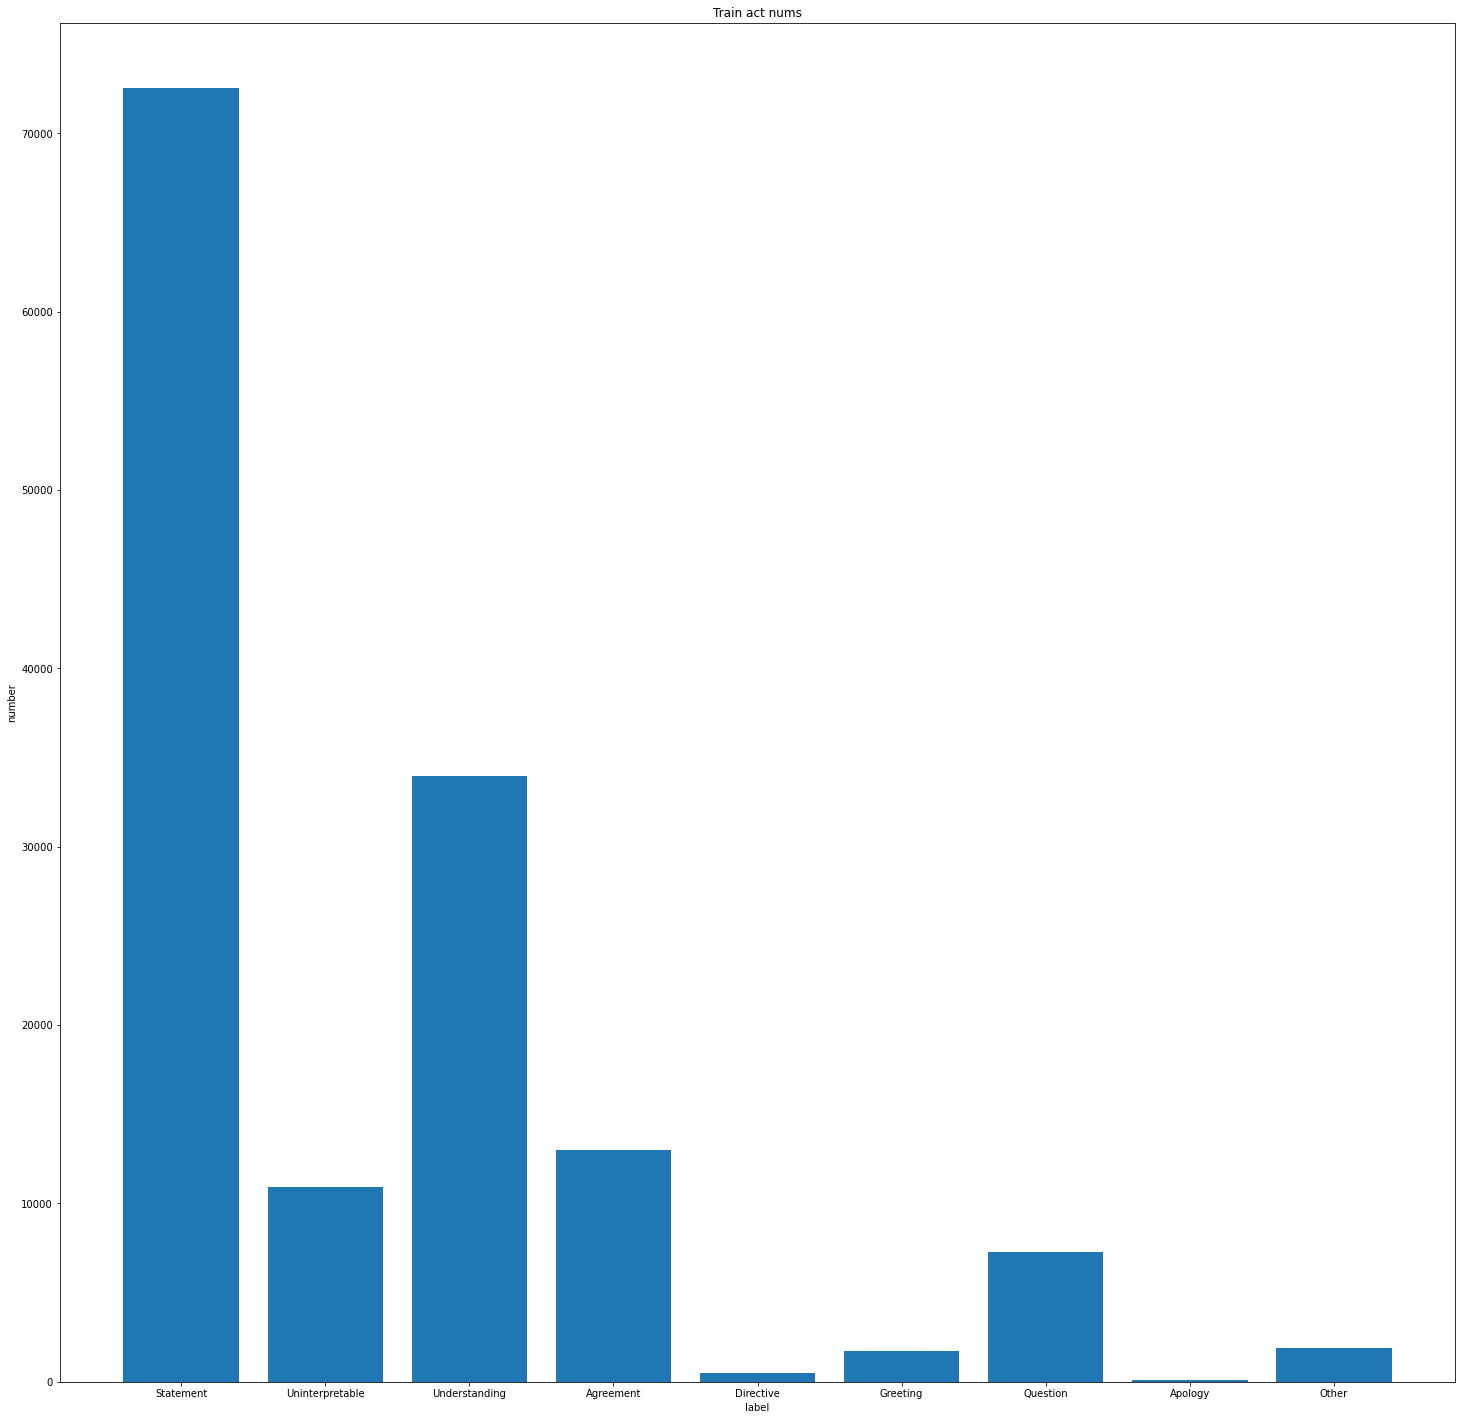

In [57]:
plt.figure(figsize=(25, 25))
plt.title("Train act nums")
plt.ylabel("number")
plt.xlabel("label")
plt.bar(x_list_act, h_value, tick_label=h_label, align="center")
plt.savefig("./logs/train_act_bar_v2.png")